# Practical no 6 : Aim: Perform autoregression on time series data

Lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Coefficients: [ 5.56429955e-01  5.88555340e-01 -9.08389232e-02  4.82525824e-02
  4.01288308e-02  3.93509765e-02  2.59094346e-02  4.46634788e-02
  1.27688308e-02  3.72271892e-02 -6.35909322e-04  4.68955775e-03
  1.83987037e-02  2.71527420e-02  5.38687107e-04  2.47899856e-02
  7.60649959e-03  9.95186007e-03  3.41614572e-02 -9.24670710e-03
  2.41985731e-02  1.88262568e-02  1.23166395e-02 -1.86042650e-02
 -1.78407089e-03  1.67121327e-02  1.97846130e-02  9.73045836e-03
  6.31625219e-03 -1.28563784e-03 -1.79066328e-04]
predicted=11.871688, expected=12.900000
predicted=13.052959, expected=14.600000
predicted=13.532909, expected=14.000000
predicted=13.244517, expected=13.600000
predicted=13.091894, expected=13.500000
predicted=13.147498, expected=15.700000
predicted=13.177283, expected=13.000000
Test RMSE: 1.225


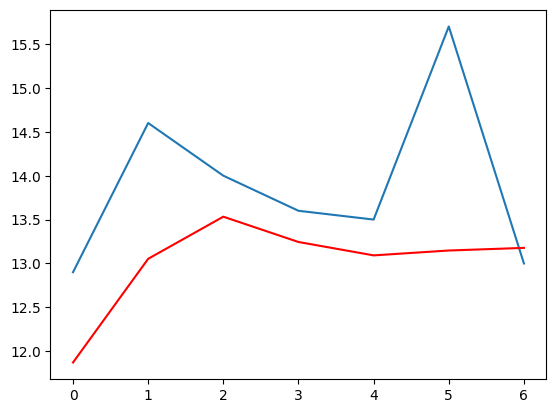

In [1]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,parse_dates=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train,30)
model_fit = model.fit()
print('Lag: %s' % model_fit.ar_lags)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()